# Nearest Neighbor Controller

In [1]:
import numpy as np
import matplotlib as mpl
from MPCNet.dataset import dataset
from MPCNet.controller import neighbor_controller, utils
from MPCNet.simulation import simulation
mpl.rcParams['figure.figsize'] = [10, 10]

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
X_raw,y = dataset.Dataset.load('test.csv')

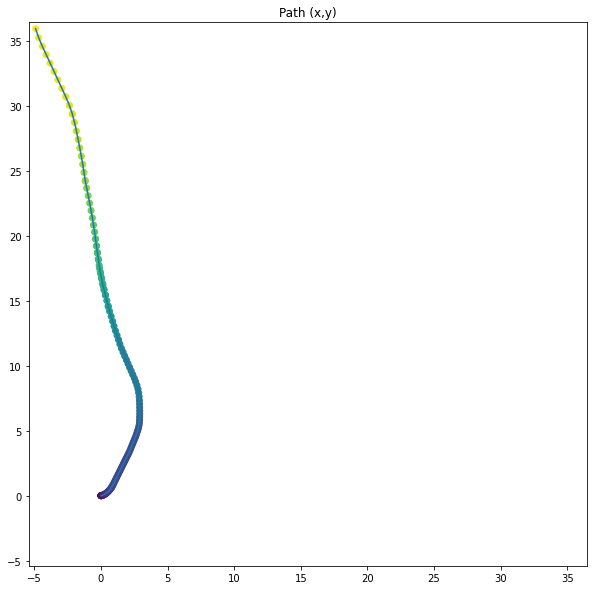

In [4]:
controllerClass = neighbor_controller.NeighborController(X_raw, y)
initialState = np.array([0, 0, 0, 0], dtype=np.double)
targetState = np.array([0, 50, 0, 0], dtype=np.double)

def controller(initState, targetState):
    return controllerClass.getControl(initState.T, targetState.T)

sim = simulation.Simulation(
    initialState,
    targetState,
    10.0,
    controller,
    stopRadius=15.0)

sim.runSimulation(50.0, quiet=True)
simulation.plot_path(sim)

In [5]:
controller(np.array([0,0,0,0], dtype=np.double), np.array([50,0,0,0], dtype=np.double))

array([1.        , 0.29701637])

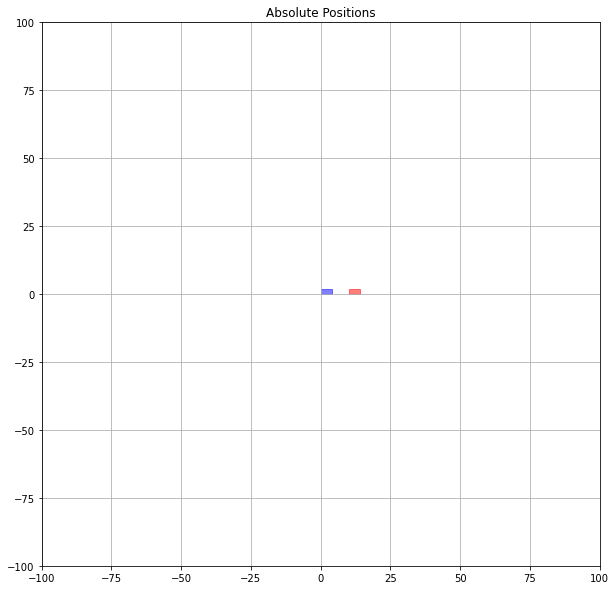

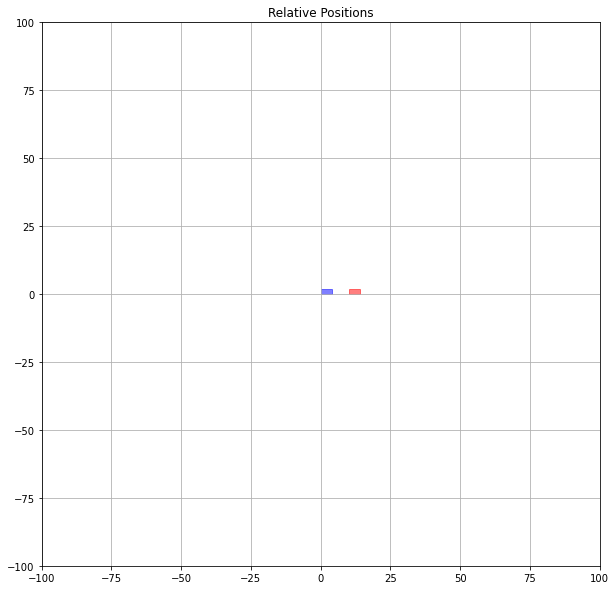

In [6]:
init = np.array([0.0, 0, 0, 0])
final = np.array([10.0, 0, 0, 0])
initRelative, finalRelative = utils.absoluteToRelative(init, final)
utils.plotAbsolute(init, final)
utils.plotRelative(initRelative, finalRelative)